In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"
from fastai.vision.data import *
from fastai.vision import *
import numpy as np
import torch
from fastai.imports import *

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 24.8MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
y
      Successfully uninstalled torch-1.9.0+cu102
y
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
y
      Successfully uninstalled torchvision-0.10.0+cu102


In [ ]:
from pickle import *
import PIL
import torchvision.transforms as T

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = Path('/content/drive/MyDrive/MYNursingHome')

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

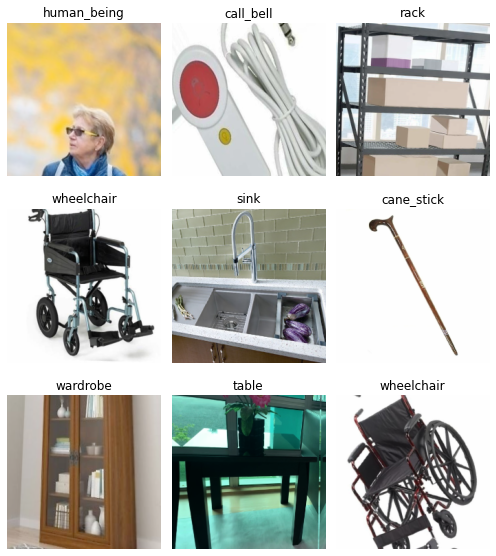

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))

In [ ]:
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [ ]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.501962,0.192163,0.939867,16:25
1,0.310207,0.129447,0.960933,16:38
2,0.269924,0.129429,0.961200,16:34
3,0.225487,0.103645,0.969200,16:31
4,0.168896,0.096808,0.972667,16:33
5,0.146725,0.081308,0.975867,16:36
6,0.119872,0.074829,0.978667,16:28
7,0.103564,0.066763,0.979067,16:38
8,0.100600,0.063149,0.981200,16:37
9,0.079484,0.064990,0.980133,16:35


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


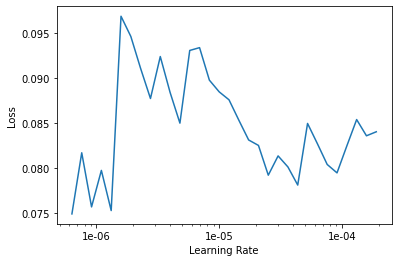

In [ ]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

In [ ]:
interpreter = ClassificationInterpretation.from_learner(learn)
interpreter.most_confused(min_val=2)

[('cabinet', 'wardrobe', 14),
 ('door', 'wardrobe', 12),
 ('wardrobe', 'cabinet', 8),
 ('bench', 'sofa', 5),
 ('door', 'refrigerator', 5),
 ('sofa', 'bed', 5),
 ('bench', 'table', 4),
 ('door', 'cabinet', 4),
 ('table', 'bench', 4),
 ('wardrobe', 'door', 4),
 ('cabinet', 'bed', 3),
 ('handrail', 'bench', 3),
 ('rack', 'cabinet', 3),
 ('walker', 'wheelchair', 3),
 ('bed', 'bench', 2),
 ('bed', 'sofa', 2),
 ('bench', 'bed', 2),
 ('bench', 'cabinet', 2),
 ('bench', 'chair', 2),
 ('cabinet', 'bench', 2),
 ('cane_stick', 'fan', 2),
 ('handrail', 'rack', 2),
 ('handrail', 'walker', 2),
 ('refrigerator', 'cabinet', 2),
 ('shower', 'call_bell', 2),
 ('table', 'refrigerator', 2),
 ('toilet_seat', 'fan', 2)]

In [ ]:
learn=learn.export('export.pkl')

In [ ]:
learn = load_learner ('/content/drive/MyDrive/models - Intel Apprenticeship/')

In [ ]:
subfolders_paths = [f.path for f in os.scandir(path) if f.is_dir()]
def get_labels(x):
    return (os.path.split(i)[1])
lis1=[]
lis2=[]
for i in subfolders_paths:
  for j in os.listdir(i):
    lis1.append(i+'/'+j)
    lis2.append(get_labels(i))
df = pd.DataFrame(lis1).astype(str)
df['Labels']=lis2
df.columns=['image','label']

In [ ]:
for i,j in df.iterrows():
  img_pil = PIL.Image.open(i)
  img_tensor = T.ToTensor()(img_pil)
  img_fastai = Image(i)
  a,cat_tensor,c = learn.predict(img_fastai)
  print(a)
  print(cat_tensor)
  print(c)